In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('all_accelerometer_data_pids_13.csv')

# Removing empty records
df = df[df['time'] != 0]
df = df.reset_index(drop = True)

# Gathering participant names
participants = pd.read_table('pids.txt', header=None)
participants = participants[0].tolist()



In [3]:
df['time_formatted'] = pd.to_datetime(df['time'], unit = 'ms')
df.head()

,time,pid,x,y,z,time_formatted
0,1493733882409,SA0297,0.0758,0.0273,-0.0102,2017-05-02 14:04:42.409
1,1493733882455,SA0297,-0.0359,0.0794,0.0037,2017-05-02 14:04:42.455
2,1493733882500,SA0297,-0.2427,-0.0861,-0.0163,2017-05-02 14:04:42.500
3,1493733883945,SA0297,-0.2888,0.0514,-0.0145,2017-05-02 14:04:43.945
4,1493733883953,SA0297,-0.0413,-0.0184,-0.0105,2017-05-02 14:04:43.953


### Verifying if the x, y, z data is recorded at 40Hz for each participant

In [4]:
# Calculate the time difference between consecutive records
df['time_diff'] = df['time_formatted'].diff()


interval_df = []
for i in participants:
    pid_data = df[df['pid'] == i]
    
    min_inter = pid_data['time_diff'].min().total_seconds() * 1000
    mean_inter = pid_data['time_diff'].mean().total_seconds() * 1000
    max_inter = pid_data['time_diff'].max().total_seconds() * 1000
    
    interval_df.append({'pid': i, 'shortest interval (ms)': min_inter, 'mean interval (ms)': mean_inter, 'longest interval (ms)': max_inter})
    
interval_df = pd.DataFrame(interval_df)
interval_df

,pid,shortest interval (ms),mean interval (ms),longest interval (ms)
0,BK7610,0.0,6.247,76.0
1,BU4707,0.0,5.593,27.0
2,CC6740,0.0,8.368,167051.0
3,DC6359,0.0,5.407,84.0
4,DK3500,0.0,6.107,35.0
5,HV0618,0.0,7.384,83.0
6,JB3156,0.0,6.464,17014.0
7,JR8022,0.0,4.322,29.0
8,MC7070,0.0,4.604,34.0
9,MJ8002,0.0,5.227,30.0


### Combining individual csv into one

Joining all the 13 csv files into one

In [5]:
participants

['BK7610',
 'BU4707',
 'CC6740',
 'DC6359',
 'DK3500',
 'HV0618',
 'JB3156',
 'JR8022',
 'MC7070',
 'MJ8002',
 'PC6771',
 'SA0297',
 'SF3079']

In [6]:
clean_tac_data = pd.DataFrame()

for participant_name in participants:
    pid_fname = f'{participant_name}_clean_TAC.csv'
    participant_df = pd.read_csv(f'clean_tac/{pid_fname}')
    
    participant_df['pid'] = participant_name
    participant_df['timestamp_for'] = pd.to_datetime(participant_df['timestamp'], unit='s')
    
    clean_tac_data = pd.concat([clean_tac_data, participant_df], ignore_index=True)


In [7]:
clean_tac_data.shape

(715, 4)

In [8]:
clean_tac_data['diff'] = clean_tac_data['timestamp_for'].diff()
clean_tac_data.head()

,timestamp,TAC_Reading,pid,timestamp_for,diff
0,1493718714,-0.000482,BK7610,2017-05-02 09:51:54,NaT
1,1493720697,0.001573,BK7610,2017-05-02 10:24:57,0 days 00:33:03
2,1493721027,0.002144,BK7610,2017-05-02 10:30:27,0 days 00:05:30
3,1493721357,0.000877,BK7610,2017-05-02 10:35:57,0 days 00:05:30
4,1493721686,-0.001145,BK7610,2017-05-02 10:41:26,0 days 00:05:29


In [9]:
df.head()

,time,pid,x,y,z,time_formatted,time_diff
0,1493733882409,SA0297,0.0758,0.0273,-0.0102,2017-05-02 14:04:42.409,NaT
1,1493733882455,SA0297,-0.0359,0.0794,0.0037,2017-05-02 14:04:42.455,0 days 00:00:00.046000
2,1493733882500,SA0297,-0.2427,-0.0861,-0.0163,2017-05-02 14:04:42.500,0 days 00:00:00.045000
3,1493733883945,SA0297,-0.2888,0.0514,-0.0145,2017-05-02 14:04:43.945,0 days 00:00:01.445000
4,1493733883953,SA0297,-0.0413,-0.0184,-0.0105,2017-05-02 14:04:43.953,0 days 00:00:00.008000


### Data Exploration

In [10]:
clean_tac_data.describe()

,timestamp,TAC_Reading,timestamp_for,diff
count,7.150000e+02,715.000000,715,714
mean,1.493758e+09,0.046124,2017-05-02 20:51:29.310489600,0 days 00:02:01.282913165
min,1.493717e+09,-0.028308,2017-05-02 09:18:43,-2 days +22:03:39
25%,1.493732e+09,0.001872,2017-05-02 13:39:31,0 days 00:30:15
50%,1.493757e+09,0.020045,2017-05-02 20:33:13,0 days 00:30:32
75%,1.493782e+09,0.076462,2017-05-03 03:25:57,0 days 00:30:44
max,1.493811e+09,0.244715,2017-05-03 11:34:00,0 days 00:39:14
std,2.707992e+04,0.056917,NaN,0 days 03:06:53.651833751


In [11]:
print('minDate: ', clean_tac_data['timestamp_for'].min())
print('maxDate: ', clean_tac_data['timestamp_for'].max())

minDate:  2017-05-02 09:18:43
maxDate:  2017-05-03 11:34:00


In [12]:
clean_tac_data.dtypes

timestamp                  int64
TAC_Reading              float64
pid                       object
timestamp_for     datetime64[ns]
diff             timedelta64[ns]
dtype: object

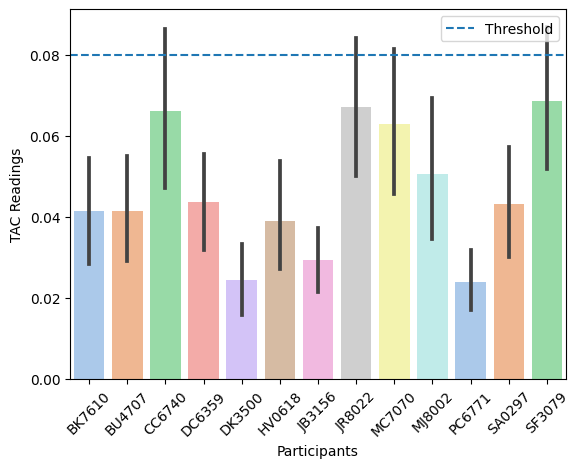

In [13]:
sns.barplot(data = clean_tac_data, x = 'pid', y = 'TAC_Reading', palette='pastel')
plt.axhline(y = 0.08, linestyle = '--', label = 'Threshold')

plt.xticks(rotation = 45)
plt.xlabel('Participants')
plt.ylabel('TAC Readings')
plt.legend()
plt.show()

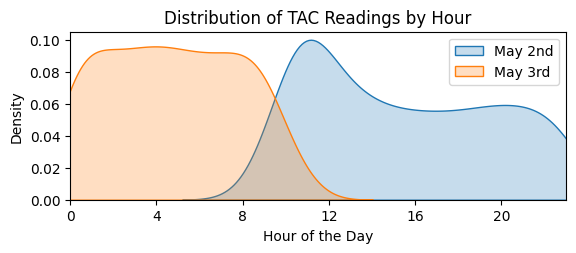

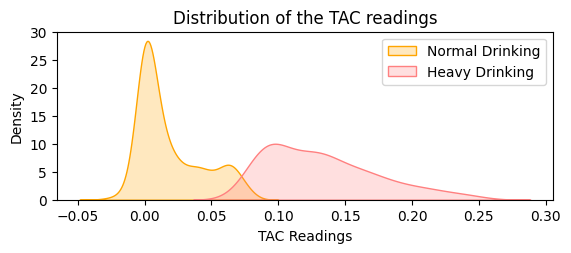

In [14]:
clean_tac_data['hour'] = clean_tac_data['timestamp_for'].dt.hour
clean_tac_data['day'] = clean_tac_data['timestamp_for'].dt.day

plt.subplot(2, 1, 1)
sns.kdeplot(clean_tac_data[clean_tac_data['day'] == 2]['hour'], fill = True)
sns.kdeplot(clean_tac_data[clean_tac_data['day'] == 3]['hour'], fill = True)
plt.title('Distribution of TAC Readings by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.legend(['May 2nd', 'May 3rd'])
plt.xticks(range(0, 24, 4))
plt.xlim(0,23)
plt.show()


plt.subplot(2, 1, 2)
sns.kdeplot(clean_tac_data[clean_tac_data['TAC_Reading'] < 0.08]['TAC_Reading'], fill=True, label = 'Normal Drinking', color='orange')
sns.kdeplot(clean_tac_data[clean_tac_data['TAC_Reading'] >= 0.08]['TAC_Reading'], fill=True, label = 'Heavy Drinking', color=(1, 0.5, 0.5))
plt.legend()
plt.title('Distribution of the TAC readings')
plt.xlabel('TAC Readings')
plt.ylim(0,30)
plt.show()


In [15]:
clean_tac_data['timestamp_for'] = pd.to_datetime(clean_tac_data['timestamp_for'])

# Extract the date and hour separately
clean_tac_data['date'] = clean_tac_data['timestamp_for'].dt.date
clean_tac_data['hour'] = clean_tac_data['timestamp_for'].dt.hour

# Group by date and find the minimum and maximum hour for each date
day_start_end_times = clean_tac_data.groupby('date')['hour'].agg(['min', 'max'])

# Print the results
print(day_start_end_times)


            min  max
date                
2017-05-02    9   23
2017-05-03    0   11


### Reducing the records

In [16]:
df = pd.read_csv('all_accelerometer_data_pids_13.csv')

# Removing empty records
df = df[df['time'] != 0]
df = df.reset_index(drop = True)

df['time_formatted'] = pd.to_datetime(df['time'], unit = 'ms')
df = df.drop(['time', 'pid'], axis = 1)

print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')
df.head()


Rows: 14057565, Columns: 4


,x,y,z,time_formatted
0,0.0758,0.0273,-0.0102,2017-05-02 14:04:42.409
1,-0.0359,0.0794,0.0037,2017-05-02 14:04:42.455
2,-0.2427,-0.0861,-0.0163,2017-05-02 14:04:42.500
3,-0.2888,0.0514,-0.0145,2017-05-02 14:04:43.945
4,-0.0413,-0.0184,-0.0105,2017-05-02 14:04:43.953


In [17]:
df['time_formatted'] = df['time_formatted'].dt.floor('60s')
df = df.groupby('time_formatted').mean().reset_index()

print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')
df.head()

Rows: 1589, Columns: 4


,time_formatted,x,y,z
0,2017-05-02 14:04:00,0.001855,0.000782,-0.001675
1,2017-05-02 14:05:00,0.000190,0.000089,-0.003093
2,2017-05-02 14:06:00,-0.011238,0.023635,0.000742
3,2017-05-02 14:07:00,0.002123,-0.000780,-0.034414
4,2017-05-02 14:08:00,0.002896,-0.000784,-0.005502


### Merging both dataframes

In [18]:
print(df.shape)
print(df.columns)

(1589, 4)
Index(['time_formatted', 'x', 'y', 'z'], dtype='object')


In [19]:
print(clean_tac_data.shape)
print(clean_tac_data.columns)

(715, 8)
Index(['timestamp', 'TAC_Reading', 'pid', 'timestamp_for', 'diff', 'hour',
       'day', 'date'],
      dtype='object')


In [20]:
clean_tac_data['time_formatted'] = clean_tac_data['timestamp_for']
clean_tac_data = clean_tac_data.drop(['timestamp', 'hour', 'day', 'date', 'timestamp_for', 'diff', 'pid'], axis = 1)

clean_tac_data['time_formatted'] = clean_tac_data['time_formatted'].dt.floor('60s')
clean_tac_data = clean_tac_data.groupby('time_formatted').mean().reset_index()

clean_tac_data.head()

,time_formatted,TAC_Reading
0,2017-05-02 09:18:00,-0.010229
1,2017-05-02 09:37:00,0.000043
2,2017-05-02 09:49:00,-0.002512
3,2017-05-02 09:51:00,-0.000482
4,2017-05-02 09:54:00,0.003249


In [21]:
linear_final_df = df.merge(clean_tac_data, on='time_formatted', how='left')
linear_final_df.head()

,time_formatted,x,y,z,TAC_Reading
0,2017-05-02 14:04:00,0.001855,0.000782,-0.001675,-0.003032
1,2017-05-02 14:05:00,0.000190,0.000089,-0.003093,-0.000132
2,2017-05-02 14:06:00,-0.011238,0.023635,0.000742,NaN
3,2017-05-02 14:07:00,0.002123,-0.000780,-0.034414,NaN
4,2017-05-02 14:08:00,0.002896,-0.000784,-0.005502,NaN


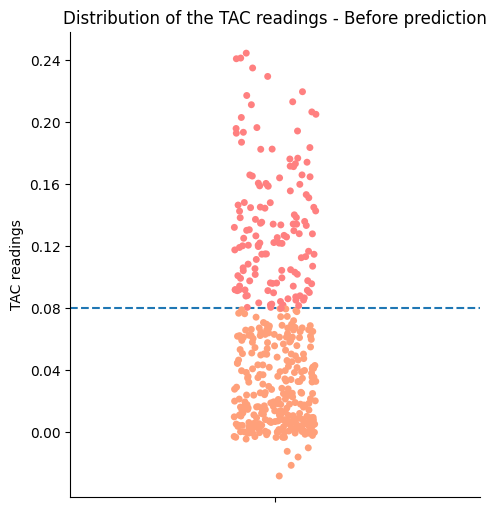

In [22]:
sns.catplot(linear_final_df[~linear_final_df['TAC_Reading'].isnull()]['TAC_Reading'], color=[(1.0, 0.627, 0.478) if x < 0.08 else (1, 0.5, 0.5) for x in linear_final_df[~linear_final_df['TAC_Reading'].isnull()]['TAC_Reading']])
plt.axhline(y = 0.08, linestyle = '--',)
plt.yticks([0, 0.04, 0.08, 0.12, 0.16, 0.20, 0.24])
plt.ylabel('TAC readings')
plt.title('Distribution of the TAC readings - Before prediction')

plt.show()

In [23]:
print('Number of Missing values: ', linear_final_df.TAC_Reading.isna().sum())

Number of Missing values:  1171


### Predicting missing values using linear regression

In [24]:
linear_final_df['year'] = linear_final_df['time_formatted'].dt.year
linear_final_df['month'] = linear_final_df['time_formatted'].dt.month
linear_final_df['day'] = linear_final_df['time_formatted'].dt.day
linear_final_df['hour'] = linear_final_df['time_formatted'].dt.hour
linear_final_df['minute'] = linear_final_df['time_formatted'].dt.minute
linear_final_df.head()

,time_formatted,x,y,z,TAC_Reading,year,month,day,hour,minute
0,2017-05-02 14:04:00,0.001855,0.000782,-0.001675,-0.003032,2017,5,2,14,4
1,2017-05-02 14:05:00,0.000190,0.000089,-0.003093,-0.000132,2017,5,2,14,5
2,2017-05-02 14:06:00,-0.011238,0.023635,0.000742,NaN,2017,5,2,14,6
3,2017-05-02 14:07:00,0.002123,-0.000780,-0.034414,NaN,2017,5,2,14,7
4,2017-05-02 14:08:00,0.002896,-0.000784,-0.005502,NaN,2017,5,2,14,8


In [25]:
missing_values = linear_final_df['TAC_Reading'].isnull()
X = linear_final_df[~missing_values][['year', 'month', 'day', 'hour', 'minute', 'x', 'y', 'z']]
y = linear_final_df[~missing_values]['TAC_Reading']

In [26]:
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

In [27]:
preds = linear_model.predict(linear_final_df[missing_values][['year', 'month', 'day', 'hour', 'minute', 'x', 'y', 'z']])
linear_final_df.loc[missing_values, 'TAC_Reading'] = preds
print('Number of Missing values: ', linear_final_df.TAC_Reading.isna().sum())

Number of Missing values:  0


In [28]:
linear_final_df.head()

,time_formatted,x,y,z,TAC_Reading,year,month,day,hour,minute
0,2017-05-02 14:04:00,0.001855,0.000782,-0.001675,-0.003032,2017,5,2,14,4
1,2017-05-02 14:05:00,0.000190,0.000089,-0.003093,-0.000132,2017,5,2,14,5
2,2017-05-02 14:06:00,-0.011238,0.023635,0.000742,0.082017,2017,5,2,14,6
3,2017-05-02 14:07:00,0.002123,-0.000780,-0.034414,0.081858,2017,5,2,14,7
4,2017-05-02 14:08:00,0.002896,-0.000784,-0.005502,0.081706,2017,5,2,14,8


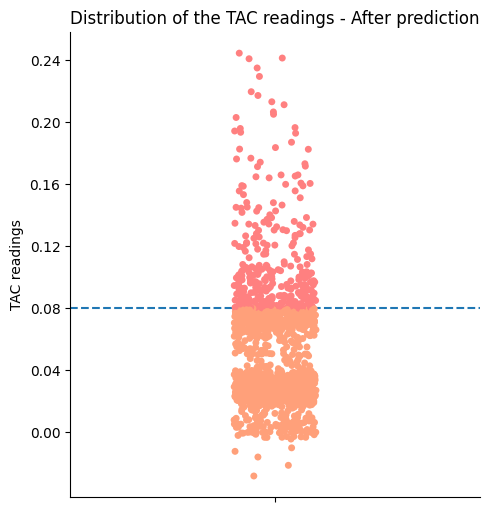

In [29]:
sns.catplot(linear_final_df['TAC_Reading'], color=[(1.0, 0.627, 0.478) if x < 0.08 else (1, 0.5, 0.5) for x in linear_final_df['TAC_Reading']], )
plt.axhline(y = 0.08, linestyle = '--',)
plt.yticks([0, 0.04, 0.08, 0.12, 0.16, 0.20, 0.24])
plt.ylabel('TAC readings')
plt.title('Distribution of the TAC readings - After prediction')
plt.show()

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clean_tac_data['result'] = clean_tac_data['TAC_Reading'].apply(lambda x: 1 if x >= 0.08 else 0)

log_final_df = df.merge(clean_tac_data, on='time_formatted', how='left')
log_final_df = log_final_df.drop('TAC_Reading', axis = 1)

log_final_df['year'] = log_final_df['time_formatted'].dt.year
log_final_df['month'] = log_final_df['time_formatted'].dt.month
log_final_df['day'] = log_final_df['time_formatted'].dt.day
log_final_df['hour'] = log_final_df['time_formatted'].dt.hour
log_final_df['minute'] = log_final_df['time_formatted'].dt.minute

print('Number of Mising values: ', log_final_df.result.isna().sum())
log_final_df.head()

Number of Mising values:  1171


,time_formatted,x,y,z,result,year,month,day,hour,minute
0,2017-05-02 14:04:00,0.001855,0.000782,-0.001675,0.0,2017,5,2,14,4
1,2017-05-02 14:05:00,0.000190,0.000089,-0.003093,0.0,2017,5,2,14,5
2,2017-05-02 14:06:00,-0.011238,0.023635,0.000742,NaN,2017,5,2,14,6
3,2017-05-02 14:07:00,0.002123,-0.000780,-0.034414,NaN,2017,5,2,14,7
4,2017-05-02 14:08:00,0.002896,-0.000784,-0.005502,NaN,2017,5,2,14,8


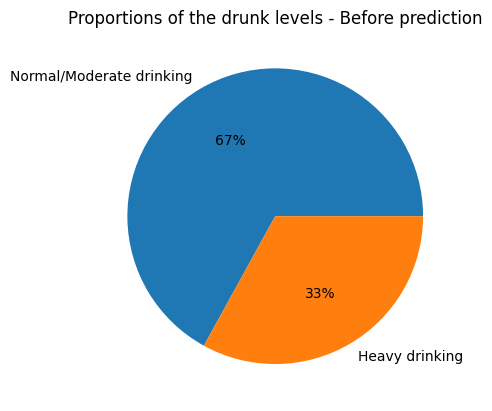

In [32]:
plt.pie(log_final_df['result'].value_counts(), labels = ['Normal/Moderate drinking', 'Heavy drinking'], autopct='%.0f%%')
plt.title('Proportions of the drunk levels - Before prediction')

plt.show()

In [33]:
missing_values = log_final_df['result'].isnull()
X = log_final_df[~missing_values][['year', 'month', 'day', 'hour', 'minute', 'x', 'y', 'z']]
y = log_final_df[~missing_values]['result']

In [34]:
log_model = LogisticRegression()
log_model.fit(X, y)

LogisticRegression()

In [35]:
preds = log_model.predict(log_final_df[missing_values][['year', 'month', 'day', 'hour', 'minute', 'x', 'y', 'z']])
log_final_df.loc[missing_values, 'result'] = preds
print('Number of Missing values: ', log_final_df.result.isna().sum())

Number of Missing values:  0


In [36]:
log_final_df

,time_formatted,x,y,z,result,year,month,day,hour,minute
0,2017-05-02 14:04:00,0.001855,0.000782,-0.001675,0.0,2017,5,2,14,4
1,2017-05-02 14:05:00,0.000190,0.000089,-0.003093,0.0,2017,5,2,14,5
2,2017-05-02 14:06:00,-0.011238,0.023635,0.000742,0.0,2017,5,2,14,6
3,2017-05-02 14:07:00,0.002123,-0.000780,-0.034414,0.0,2017,5,2,14,7
4,2017-05-02 14:08:00,0.002896,-0.000784,-0.005502,0.0,2017,5,2,14,8
...,...,...,...,...,...,...,...,...,...,...
1584,2017-05-03 16:30:00,-0.219377,-0.531619,0.078867,0.0,2017,5,3,16,30
1585,2017-05-03 16:31:00,0.054242,0.215892,0.243929,0.0,2017,5,3,16,31
1586,2017-05-03 16:32:00,0.004057,0.255445,0.174700,0.0,2017,5,3,16,32
1587,2017-05-03 16:33:00,0.006580,0.256223,0.201364,0.0,2017,5,3,16,33


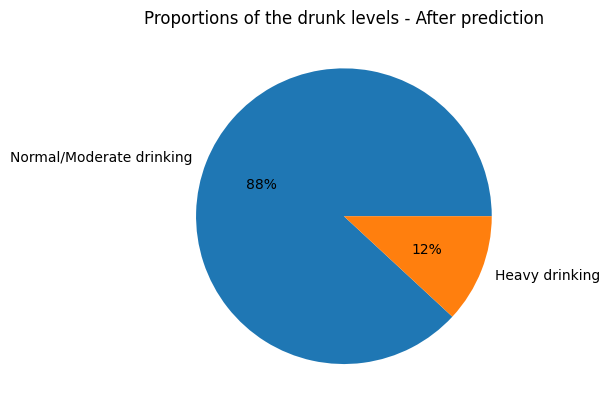

In [37]:
plt.pie(log_final_df['result'].value_counts(), labels = ['Normal/Moderate drinking', 'Heavy drinking'], autopct='%.0f%%')
plt.title('Proportions of the drunk levels - After prediction')

plt.show()